# Ensemble Learning
## Introduction
Ensemble methods combine multiple hypotheses, aiming to form a better one than the best hypothesis alone. Often, ensemble methods use multiple weak learners to build a strong learner.

A **weak learning** is one that consistently generates better predictions than random.

Ensemble methods use multiple learning algorithms (or instances) to obtain better predictive performance than could be obtained from any of the individual learning algorithms (or instances) alone. A machine learning ensemble can consist of a finite set of alternative models, which are more general classification models discretely.

The common ensemble training scheme employs numerous weaker classifiers that use only subsets of the dataset in terms of rows (data points) or columns (features), and then conducts a majority voting among their resulting predictions to decide on a particular single data point classification.

One important advantage of ensemble methods is the reduction of over-fitting.

## Bagging or Bootstrap Aggregating
Bagging trains each model in the ensemble using a randomly drawn subset of the training set. Then lets each model in the ensemble vote with equal weight. The random forest algorithm combines random decision trees with bagging to achieve high classification accuracy while preserving model generality, which is one of the reasons why the Random Forest classifier is very popular.

## Curse of Dimensionality
In machine learning one of the biggest difficulty is dealing with high number of dataset features or lack of enough data points to cover them. As an example, when a naive model requires $5$ data points on each feature of a $100$ feature dataset, the **joint** density function would ideally necessitate $5^{100}$ data points, so that the density function could be computed perfectly. This is not only too big of a dataset size but also it might be impossible to acquire such a dataset. In practice, the curse of dimensionality is avoided by assuming the features are independent, such as the Naive Bayes assumption. The alternative approach is using ensembles of weak classifiers and bagging, so that each classifier would work on a subset of features.

## Boosting
Boosting trains several weak learning algorithms and combine (i.e. summation) their weighted results. Boosting builds an ensemble by training each new model instance in such a way to improve upon the previous models mis-classify. The most common implementation of boosting is Adaboost where the classifier is composed of $T$ many classifiers such that $F_T(x) = \sum_{t=1}^{T} f_t(x)$. The training is done such that the error is minimized at every iteration, $E_T = \sum_i E (F_{t-1}(x_i) + \alpha_t h(x_i)$

## Random Forest
he Random Forest classifier is a method that combines the decision trees and ensemble learning. The forest is composed of many trees that use randomly picked data features (attributes) as their input. The forest generation process constructs a collection of trees with controlled variance. The resulting prediction can be decided by majority voting or weighted voting. Random Forests have several advantages, such as a low number of control and model parameters, resistance to overfitting, no requirement for feature selection or feature reduction because they can use a large number of potential attributes. If some features are not useful for prediction, the algorithm will simply ignore them. One important advantage of Random Forest is that the variance of the model decreases as the number of trees in the forest increase, whereas the bias remains the same.

Random Forests have some disadvantages such as low model interpretability, performance loss due to correlated (dependent) variables, and dependence on the random number generator of the implementation. Note that all these disadvantages (except for the third one which is relatively easy to fix) are inherent to several other popular classifiers.

### Implementation Details
Number of features in each tree can be set to either $\sqrt{M}$, or $\log_2(M+1)$ for a dataset $X \in \mathbb{R}^{N \times M}$

Ensemble size determination remains to be a challenge. In practice a size is picked subjectively according to the number of features and data points.

## Decision Tree Learning
Given: Collection of examples ($x, f(x)$)
Return: a function *h* (hypothesis) that approximates $f$, where $h$ is a decision tree

Note that $f(x)$ is generally know and a dataset (of observations or records) is considered. In our common problems, we have $X$ as the dataset and $y$ as the observations (ground truth labels).

Input: An object or situation described by a set of attributes (or features), i.e. the dataset $X$
Output: a "decision" $\rightarrow$ predicts the output value for the input, i.e. $y$

For a decision tree learner, the input attributes can be nominal (discrete) or numerical (continuous).

A decision tree is a tree with two types of nodes  
* Decision nodes, specifies a test on a feature (attribute) with 2 or more alternatives
  * Every decision node is in the path to a leaf node  
* Leaf nodes, indicates a classification of a data point (example, test)

The following cells demonstrate how to use this data in a regular classifier.



In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder  # Generally used for supervised learning targets

df = pd.DataFrame(
    np.array([['good', 'yes', 'ok'],
              ['good', 'no', 'high'],
              ['good', 'yes', 'high'],
              ['good', 'no', 'ok'],
              ['ok', 'yes', 'ok'],
              ['bad', 'yes', 'ok'],
              ['good', 'yes', 'ok'],
              ['good', 'yes', 'high'],
              ['ok', 'yes', 'ok'],
              ['good', 'yes', 'ok']
             ]),
    columns=['Food', 'Speedy', 'Price'])

df['Will_Tip'] = pd.Series(np.array(['yes', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'yes']))

# Convert nominals to numerical keeping the order - sklearn requirement for DecisionTreeClassifier
df['Food'] = df['Food'].replace({'bad':0, 'ok':1, 'good':2})
df['Speedy'] = df['Speedy'].replace({'no':0, 'yes':1})
df['Price'] = df['Price'].replace({'high':0, 'ok':1})

# Prepare X and y
X = df.loc[:, df.columns != 'Will_Tip'].values
y = df.loc[:, df.columns == 'Will_Tip'].values.ravel()

# Convert y values to 0, 1 for sklearn
y_le = LabelEncoder()
y = y_le.fit_transform(y)

# Sanity
df.head()

,Food,Speedy,Price,Will_Tip
0,2,1,1,yes
1,2,0,0,no
2,2,1,0,yes
3,2,0,1,yes
4,1,1,1,no


In [2]:
from sklearn.tree import DecisionTreeClassifier

willtip_clf = DecisionTreeClassifier(random_state=0)
model = willtip_clf.fit(X, y)

The following visualization requires `graphviz` which can be installed by `conda install python-graphviz`

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from IPython.display import Image  
from subprocess import call

# export_graphviz will generate a DOT image file in the folder with this notebook
dot_data = export_graphviz(willtip_clf,
                           out_file='wt_tree.dot',
                           feature_names=df.columns[:-1],
                           class_names=y_le.classes_,
                           filled=True,
                           rounded=True,
                           special_characters=True)

# Convert the DOT file to PNG
call(['dot', '-Tpng', 'wt_tree.dot', '-o', 'wt_tree.png', '-Gdpi=60'], shell=True)

# Display the decision tree
Image(filename = 'wt_tree.png')

ValueError: Length of feature_names, 68 does not match number of features, 3

---
Example: Following is another decision example using the Iris dataset.

In [4]:
from sklearn import datasets

# Load the data
iris = datasets.load_iris()

# 
iris_clf = DecisionTreeClassifier(random_state=0)
model = iris_clf.fit(iris.data, iris.target)

# Generate the learned tree using DOT language and graphviz
dot_data = export_graphviz(iris_clf,
                           out_file='iris_tree.dot',
                           feature_names=iris.feature_names,
                           class_names=iris.target_names,
                           filled=True,
                           rounded=True,
                           special_characters=True)

# Convert the DOT file to PNG
call(['dot', '-Tpng', 'iris_tree.dot', '-o', 'iris_tree.png', '-Gdpi=60'], shell=True)

# Display the decision tree
Image(filename = 'iris_tree.png')

FileNotFoundError: [Errno 2] No such file or directory: 'iris_tree.png'

---
## ID3 Algorithm: Building a Decision Tree
**Hard problem:** If the dataset has $M$ *binary* features then there are $2^M$ rows in the *complete* truth table. In addition, if the outcome, i.e. target variable, is binary then each row can have a ${0,1}$ output. The numbers of possible ways to build this truth table is $2^2^M$. Thus the solution space is exponential, and the decision tree algorithms are always have to be *greedy* as there is no known method to solve them in polynomial time.

All greedy algorithms have a **strategy**.

**Occam's Razor**, the principle of parsimony, is the principle that one should not make more assumptions than the minimum needed.

All scientific modeling and theory building is based on this principle.

Another interpretation, all other things being equal, pick the smallest explanation.

Building a decision tree using Occam's Razor principle results in the smallest tree possible. The approach also minimizes overfitting.

Algorithm idea: Recursively pick the *most significant* attribute as root of the (sub)tree
* Use a top-down greedy search through the space of possible decision trees
* Greedy strategy - pick the highest/best value first

Measure of the worthiness of an attribute: Information Gain

$I=-\sum_{i=1}^{K} P\left(y_{i}\right) \log _{2}\left(P\left(y_{i}\right)\right)$

$I\left(\frac{p}{p+n}, \frac{n}{p+n}\right)=-\frac{p}{p+n} \log _{2}\left(\frac{p}{p+n}\right)-\frac{n}{p+n} \log _{2}\left(\frac{n}{p+n}\right)$

$I$ is also called **entropy** of the prior.

A good strategy is starting with the feature that has the highest entropy of the dependent variable.
* *Information* answers questions. The more clueless I am about a question, the more information the answer contains.

**Intuition**: Pick the attribute that reduces the entropy (uncertainty) the most.

$\mathrm{IG}(\mathrm{A})=\mathrm{I}-\mathrm{remainder}(\mathrm{A})$

$\mathrm{A}$ is the remaining uncertainty after getting info (i.e. using on a decision tree to decide, split)

$\text { remainder }(\mathrm{A})=\sum_{i=1}^{K} \frac{p_{i}+n_{i}}{p+n} I\left(\frac{p_{i}}{p+n}, \frac{n_{i}}{p+n}\right)$

---

## Demonstrating the Power of Numerous Weak Classifiers as a Group
Note that not all datasets would benefit an ensemble classifier. The following cells demonstrate the power of the ensemble classifier with the following steps.
* Data exploration
* Evaluating regular classifiers on the dataset
* Building an ensemble

Recall that a few strategies to build a weak learner:

* Use a subset of dataset in training
* Use a subset of features in training
* Use a weak learner (generally more primitive and have higher generalization, or abstraction)

Note that the test on the weak learner has to match the subset features that the learning model uses.



In [5]:
# Locate and load the data file
df = pd.read_csv('../datasets/module06_titanic_preprocessed.csv')

# Sanity check
print(f'#rows={len(df)}, #columns={len(df.columns)}')
df.head()

#rows=891, #columns=69


,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,...,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Singleton,SmallFamily,LargeFamily,Survived
0,1,22.0,1,0,7.2500,0,0,1,0,0,...,0,0,0,0,0,2,0,1,0,0
1,0,38.0,1,0,71.2833,0,0,0,1,0,...,0,0,0,0,0,2,0,1,0,1
2,0,26.0,0,0,7.9250,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0,35.0,1,0,53.1000,0,0,0,1,0,...,0,0,0,0,1,2,0,1,0,1
4,1,35.0,0,0,8.0500,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0


/Users/josephcrandall/.pyenv/versions/3.7.3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


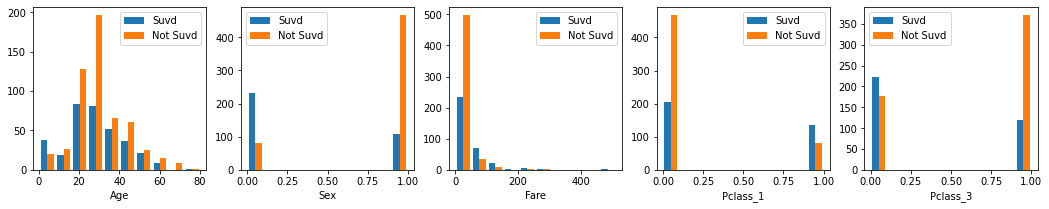

In [6]:
# Data exploration, a few plots
def plt_var(_col):
    plt.hist([df[df['Survived']==1][_col],df[df['Survived']==0][_col]], label=['Suvd','Not Suvd'])
    plt.xlabel(_col)
    plt.legend()    
#
plt.figure(figsize=(18, 3))
plt.subplot(1, 5, 1)
plt_var('Age')
#
plt.subplot(1, 5, 2)
plt_var('Sex')
#
plt.subplot(1, 5, 3)
plt_var('Fare')
#
plt.subplot(1, 5, 4)
plt_var('Pclass_1')
#
plt.subplot(1, 5, 5)
plt_var('Pclass_3')
#
plt.show()

---
**Evaluate numerous classifiers** by a stratified 10-fold CV as in the following cells.

In [7]:
# Prepare the input X and y
dfX = df.loc[:, df.columns != 'Survived']
dfy = df.loc[:, df.columns == 'Survived'].values.ravel()

# Sanity check
print(f'N={len(dfX)}, M={len(dfX.columns)}')

N=891, M=68


In [8]:
# Set our main data structures X and y
X = dfX.values
y = dfy

In [9]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# 10-fold CV evaluation of a classifier
def eval_classifier(_clf, _X, _y):
    acc = []
    kf = StratifiedKFold(n_splits=10, shuffle=False, random_state=None)
    for train_index, test_index in kf.split(_X, _y):
        _clf.fit(_X[train_index], _y[train_index])
        y_pred = _clf.predict(_X[test_index])
        acc += [accuracy_score(_y[test_index], y_pred)]
    return np.array(acc)

In [10]:
from sklearn.naive_bayes import GaussianNB

acc = eval_classifier(GaussianNB(),
                      X, y)
print(f'Naive Bayes CV accuracy={np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')

Naive Bayes CV accuracy=0.45 ±0.019


In [11]:
from sklearn.svm import LinearSVC

# Problem is difficult and LinearSVC does not converge
# Increase the convergence tolerance to a very high number
acc = eval_classifier(LinearSVC(tol=10),
                      X, y)
print(f'Linear SVC CV accuracy={np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')

Linear SVC CV accuracy=0.77 ±0.049


In [12]:
from sklearn.svm import LinearSVC

# See balancing the classes with penalties help or not
acc = eval_classifier(LinearSVC(class_weight='balanced', tol=10),
                      X, y)
print(f'Linear SVC CV accuracy={np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')

Linear SVC CV accuracy=0.75 ±0.116


In [13]:
from sklearn.svm import SVC

acc = eval_classifier(SVC(kernel='rbf', gamma=.5, C=2),
                      X, y)
print(f'SVM RBF CV accuracy={np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')

SVM RBF CV accuracy=0.66 ±0.030


In [14]:
from sklearn.svm import SVC

acc = eval_classifier(SVC(kernel='rbf', gamma=.05, C=2),
                      X, y)
print(f'SVM RBF CV accuracy={np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')

SVM RBF CV accuracy=0.74 ±0.039


In [15]:
from sklearn.linear_model import LogisticRegression

acc = eval_classifier(LogisticRegression(solver='lbfgs', multi_class='auto', max_iter =1000, class_weight='balanced'),
                      X, y)
print(f'Logistic Regression CV accuracy={np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')

Logistic Regression CV accuracy=0.81 ±0.038


In [16]:
from sklearn.neural_network import MLPClassifier

acc = eval_classifier(MLPClassifier(hidden_layer_sizes=(50,100),max_iter=500),
                      X, y)
print(f'Neural Network CV accuracy={np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')

Neural Network CV accuracy=0.79 ±0.035


In [17]:
acc = eval_classifier(MLPClassifier(hidden_layer_sizes=(20,50,50,20),max_iter=2000),
                      X, y)
print(f'Neural Network CV accuracy={np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')

Neural Network CV accuracy=0.79 ±0.064


In [18]:
from sklearn.neighbors import KNeighborsClassifier

acc = eval_classifier(KNeighborsClassifier(n_neighbors=1),
                      X, y)
print(f'K Nearest Neighbor CV accuracy={np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')

K Nearest Neighbor CV accuracy=0.70 ±0.031


In [19]:
acc = eval_classifier(DecisionTreeClassifier(),
                      X, y)
print(f'Decision Tree CV accuracy={np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')

Decision Tree CV accuracy=0.80 ±0.038


In [20]:
from sklearn.ensemble import RandomForestClassifier

acc = eval_classifier(RandomForestClassifier(n_estimators=200, max_depth=5, random_state=None, n_jobs=4),
                      X, y)
print(f'Random Forest CV accuracy={np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')

Random Forest CV accuracy=0.83 ±0.034


Best result so far..

---

**Build an ensemble** using regular Naive Bayes (NB) classifier as the weak learner. As can be seen above, its performance is almost half of the Random Forest ensemble classifier.

The following approach uses a subset of features to generate a Naive Bayes classifier. Note that `_clf` is the weak classifier model and its `predict` function will be used. It is only called a weak model because a subset of features are passed for learning.

We also compute the original class `Priors` from the full dataset to be fair to the NB learner.

In [22]:
# Main Priors
counts = np.unique(y, return_counts=True)
NBpriors = [counts[1][0]/len(y), counts[1][1]/len(y)]
#
print(NBpriors)

[0.6161616161616161, 0.3838383838383838]


In [23]:
acc = eval_classifier(GaussianNB(priors=NBpriors), X, y)
print(f'Naive Bayes CV accuracy={np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')

# For reference
acc = eval_classifier(RandomForestClassifier(n_estimators=200, max_depth=5, random_state=None, n_jobs=4), X, y)
print(f'Random Forest CV accuracy={np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')

Naive Bayes CV accuracy=0.45 ±0.019
Random Forest CV accuracy=0.83 ±0.033


In [24]:
# Let's build a weak learner using GaussianNB by subset of features
def weakNB_fit(_list_cols, _X, _y):
    Xs = _X[:,_list_cols]
    return GaussianNB(priors=NBpriors).fit(Xs, _y)

def weakNB_predict(_clf, _list_cols, _X):
    Xs = _X[:,_list_cols]
    return _clf.predict(Xs), _clf.predict_proba(Xs)

# Use _m features randomly selected, a total of M weak learners
def features_randomsubset(_M, _m, nensemble=1):
    from numpy.random import choice
    # returns a list of list of column choices - subset features
    return [choice(_M, _m, replace=False) for _ in range(nensemble)]

In [25]:
%%time

def eval_weak(_X, _y, _nensemble, _nfeatures):
    acc = []
    for j in range(_nensemble):
        # Keep subset features, columns same for a 10-fold
        cols = features_randomsubset(_X.shape[1], _nfeatures, nensemble=1)
        # 10-fold CV
        kf = StratifiedKFold(n_splits=10, shuffle=False, random_state=None)
        for train_index, test_index in kf.split(_X, _y):
            clf = weakNB_fit(cols[0], _X[train_index], _y[train_index])
            y_pred, y_prob = weakNB_predict(clf, cols[0], _X[test_index])
            acc += [accuracy_score(_y[test_index], y_pred)]
    #
    return np.array(acc)
    
# Measure individual weak learners performance
acc = eval_weak(X, y, 100, 5)

# Sanity
print(f'total #results={len(acc)}')
#
print(f'Weak learners average Acc= {np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')

total #results=1000
Weak learners average Acc= 0.53 ±0.146
CPU times: user 1.15 s, sys: 5.8 ms, total: 1.15 s
Wall time: 1.16 s


Interestingly, by using the good old `GaussianNB` with a small dataset and accumulating its accuracy shows a jump in performance compared to the plain NB using all features at the same time.

**Question 1:** Why the performance increase?  
**Question 2:** Why the increase in error standard deviation?

Note: Attempting number of features `nfeatures=3` or so might cause individual `GaussianNB` classifier to fail due to data problems with that particular subset of features (such as no data point for the target, or all same values for a column).

In [27]:
# Generate numerous trained NB classifiers based on subset features
def ensembleNB_fit(_ensemble_cols, _X, _y):
    # the list of ensemble columns have a column list for every member of the ensemble
    nensemble = len(_ensemble_cols)
    # list of weak learners
    ensemble_clf = []
    for j in range(nensemble):
        ensemble_clf += [weakNB_fit(_ensemble_cols[j], _X, _y)]
    #
    return ensemble_clf

# Using learned ensemble predict the outcome with majority voting
def ensembleNB_predict(_ensemble_clf, _ensemble_cols, _Xtest):
    from collections import defaultdict
    nensemble = len(_ensemble_clf)
    assert nensemble==len(_ensemble_cols)  # Error check
    # weak learner predictions
    ypred_e, yprob_e = [], []
    for j in range(nensemble):
        res = weakNB_predict(_ensemble_clf[j], _ensemble_cols[j], _Xtest)
        ypred_e += [res[0]]
        yprob_e += [res[1]]  # score of the prediction
    # majority voting for each data point in _Xtest
    ypred = []
    for i in range(_Xtest.shape[0]):
        ypred_scores = defaultdict(float)
        for j in range(nensemble):
            for c, p in enumerate(yprob_e[j][i]):
                # a proper score is necessary
                ypred_scores[c] += p
        ix = max(ypred_scores.items(), key=lambda a: a[1])
        ypred += [ix[0]]
    #
    return np.array(ypred)

In [28]:
%%time

def eval_ensemble(_X, _y, _niter, _nensemble, _nfeatures):
    acc = []
    for i in range(_niter):
        # Keep subset features, columns same for a 10-fold
        cols = features_randomsubset(_X.shape[1], _nfeatures, nensemble=_nensemble)
        # 10-fold CV
        kf = StratifiedKFold(n_splits=10, shuffle=False, random_state=None)
        for train_index, test_index in kf.split(_X, _y):
            clf = ensembleNB_fit(cols, _X[train_index], _y[train_index])
            y_pred = ensembleNB_predict(clf, cols, _X[test_index])
            acc += [accuracy_score(_y[test_index], y_pred)]
    #
    return np.array(acc)
#
# Measure ensemble weak learners performance
acc = eval_ensemble(X, y, 10, 200, 7)
#
print(f'Ensemble learners average Acc= {np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')

Ensemble learners average Acc= 0.39 ±0.007
CPU times: user 20.2 s, sys: 76.7 ms, total: 20.3 s
Wall time: 20.3 s


**Question:** Above results are not very promising, so do you think we have a bug in the scripts?

---

## Improvements
More or less half of the features are not useful in this dataset. So, subsets of them are not useful either. Random Forest classifier ignores many of these by employing **entropy** or **information gain** strategy. However such capability does not exist for a plain NB classifier. Thus, we need to do some kind of feature ranking.

Use a simple approach and check the **correlation** between `X` columns and the target variable `y`. Drop the bottom performers.

In [29]:
# Direct correlation between each column of X and the target y
corrs = np.array([np.correlate(X[:,j], y)[0] for j in range(X.shape[1])])

# Reverse sort, numpy array negation reverses the order
ranks = np.argsort((-corrs))

# Display top-9 and bot-5
rankings = [(f'{corrs[j]:.1f}', df.columns[j]) for j in ranks]
display(rankings[:9])
display(rankings[-5:])

[('16551.2', 'Fare'),
 ('9639.2', 'Age'),
 ('663.0', 'FamilySize'),
 ('254.0', 'Ticket_XXX'),
 ('219.0', 'Embarked_S'),
 ('206.0', 'Cabin_U'),
 ('169.0', 'SmallFamily'),
 ('162.0', 'SibSp'),
 ('159.0', 'Parch')]

[('0.0', 'Ticket_SCA4'),
 ('0.0', 'Ticket_SCA3'),
 ('0.0', 'Ticket_Fa'),
 ('0.0', 'Ticket_LP'),
 ('0.0', 'Ticket_A')]

In [30]:
# Find columns with correlation=2 or less and delete them from X
delcols = [(j, f'{corrs[j]:.1f}', df.columns[j]) for j in ranks if corrs[j]<=2]
#
print(delcols)

[(47, '2.0', 'Ticket_SCAH'), (60, '2.0', 'Ticket_SWPP'), (55, '2.0', 'Ticket_SOTONOQ'), (50, '2.0', 'Ticket_SCParis'), (42, '2.0', 'Ticket_PP'), (33, '2.0', 'Ticket_C'), (29, '2.0', 'Ticket_A5'), (20, '2.0', 'Cabin_G'), (39, '1.0', 'Ticket_LINE'), (43, '1.0', 'Ticket_PPP'), (44, '1.0', 'Ticket_SC'), (62, '1.0', 'Ticket_WEP'), (61, '1.0', 'Ticket_WC'), (51, '1.0', 'Ticket_SOC'), (65, '0.0', 'Singleton'), (28, '0.0', 'Ticket_A4'), (30, '0.0', 'Ticket_AQ3'), (59, '0.0', 'Ticket_STONOQ'), (31, '0.0', 'Ticket_AQ4'), (32, '0.0', 'Ticket_AS'), (56, '0.0', 'Ticket_SP'), (54, '0.0', 'Ticket_SOTONO2'), (53, '0.0', 'Ticket_SOPP'), (52, '0.0', 'Ticket_SOP'), (35, '0.0', 'Ticket_CASOTON'), (36, '0.0', 'Ticket_FC'), (48, '0.0', 'Ticket_SCOW'), (21, '0.0', 'Cabin_T'), (46, '0.0', 'Ticket_SCA4'), (45, '0.0', 'Ticket_SCA3'), (38, '0.0', 'Ticket_Fa'), (40, '0.0', 'Ticket_LP'), (27, '0.0', 'Ticket_A')]


In [31]:
# Column numbers to delete
dd = [d[0] for d in delcols]

# Drop those columns, axis=1
Xpp = np.delete(np.array(X, copy=True), dd, axis=1)

# Xpp is new pre-processed X

# Sanity check
print(f'{X.shape}, {Xpp.shape}')

(891, 68), (891, 35)


In [32]:
# Base classifier
acc = eval_classifier(GaussianNB(priors=NBpriors), Xpp, y)
accNB, stdevNB = np.mean(acc), np.std(acc)
print(f'Naive Bayes CV accuracy={accNB:.2f} {chr(177)}{stdevNB:.3f}')

# Reference
acc = eval_classifier(RandomForestClassifier(n_estimators=200, max_depth=5, random_state=None, n_jobs=4), Xpp, y)
print(f'Random Forest CV accuracy={np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')

Naive Bayes CV accuracy=0.76 ±0.044
Random Forest CV accuracy=0.83 ±0.036


**Notice:** The plain Naive Bayes has an improved performance now, since we are helping NB with the removal of uncorrelated features. Random Forest uses information gain to do this by itself.

In [33]:
%%time
# Measure weak learners performance on updated X
acc = eval_weak(Xpp, y, 100, 5)
print(f'Weak learners average Acc= {np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')

Weak learners average Acc= 0.69 ±0.060
CPU times: user 1.12 s, sys: 5.48 ms, total: 1.13 s
Wall time: 1.13 s


In [34]:
acc = eval_ensemble(Xpp, y, 10, 200, 11)
print(f'Ensemble learners average Acc= {np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')

Ensemble learners average Acc= 0.78 ±0.035


In [35]:
# Number of features
M = Xpp.shape[1]

**Notice:** The following experiment takes around 12 minutes on my machine to run.

In [36]:
%%time

# Run an experiment for a full scale of number of features
valsF, accF, stdevF = np.arange(1,M+1), [], []
for nf in valsF:
    acc = eval_ensemble(Xpp, y, 10, 200, nf)
    accF += [np.mean(acc)]
    stdevF += [np.std(acc)]

CPU times: user 12min 17s, sys: 2.57 s, total: 12min 20s
Wall time: 12min 22s


## Performance Comparison
Since we are varying the feature subset size for the ensemble NB, we can do something similar for the plain NB. Let's vary the features added for classification using the ranked features and plot the 10-fold CV performance. By ranking the features we are helping the plain Naive Bayes immensely.

Note that both the ensemble test and plain NB test have 10 iterations to collect sufficient statistics.

In [37]:
%%time

# Add number of iterations - better statistics
def eval_classifier_niter(_clf, _X, _y, _niter):
    return np.array([eval_classifier(_clf, _X, _y) for i in range(_niter)])

# Get the X matrix starting from the high-ranked variables
def getX(_X, _ncols, _ranks):
    cols = [j for n, j in enumerate(_ranks) if n < _ncols]
    return np.array(_X[:,cols])

# Iterate over the features, adding 1 by 1 by starting from the first (the best) feature
valsNB, accNB, stdevNB = np.arange(1,M+1), [], []
for nc in valsNB:
    # feature order is coming from ranks
    X_nb = getX(X, nc, ranks)
    acc = eval_classifier_niter(GaussianNB(priors=NBpriors), X_nb, y, 10)
    accNB += [np.mean(acc)]
    stdevNB += [np.std(acc)]

CPU times: user 3.39 s, sys: 14.1 ms, total: 3.4 s
Wall time: 3.41 s


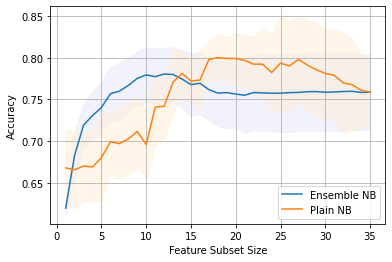

In [38]:
# Ease of computation for the plotting of the error band
accF, stdevF = np.array(accF), np.array(stdevF)
accNB, stdevNB = np.array(accNB), np.array(stdevNB)

# Plot
plt.plot(valsF, accF, label='Ensemble NB')
plt.plot(valsNB, accNB, label='Plain NB')
plt.fill_between(valsF, accF-stdevF, accF+stdevF, color='lavender', alpha=0.5)
plt.fill_between(valsNB, accNB-stdevNB, accNB+stdevNB, color='papayawhip', alpha=0.5)
plt.xlabel('Feature Subset Size')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Conclusions
1. Ensemble performance is better than the plain NB when all features are added
2. Ensemble has better generalization performance (why?)
3. Ensemble performance has smaller error variance
4. Ensemble uses all features randomly picked
5. Plain NB starts adding the best features first, thus even with 1 feature its performance is 67%
6. There is an optimum number of features for the NB
7. The plain NB performance sensitivity to the features included is high (why?)
8. The ensemble performance sensitivity to the features included is lower (why?)

**Question:** From the above plot, the performance of the ensemble looks a bit less than the plain NB, do you agree with this statement? Why? 

---

## Exercises

**Exercise 6.1** Add the data points `['good', 'yes', 'ok', 'no']` to the data and rebuild the tree. Observe the difference between the previous and the current.